Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID
Balance--Number of miles eligible for award travel
Qual_mile--Number of miles counted as qualifying for Topflight status
cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months
Bonus_trans--Number of non-flight bonus transactions in the past 12 months
Flight_miles_12mo--Number of flight miles in the past 12 months
Flight_trans_12--Number of flight transactions in the past 12 months
Days_since_enrolled--Number of days since enrolled in flier program
Award--whether that person had award flight (free flight) or not


* Loaded the dataset 'Airlines'
* Normalized the all input variable of the dataset.
* Removed the ID column from the input variables.

* Hierarchial clustering

* Hierarchial clustering with no. of clusters as 3
        
    Clusters    Counts
        1         2518
        0         1480
        2            1

* Plotted the graph for the clusters obtained
* However, did not obtained distinct clusters, clusters were merging into each other.

* KMeans clustering

* standardized the input
* Plotted elbow curve to obtain the ideal no. of clusters from the curve.
* Did KMeans Clustering with

    No. of clusters = 2
    
    cluster   Counts
        0       2699
        1       1300
       
    No. of clusters = 7
    
    cluster   Counts
        1       2063
        0        894
        3        804
        2        125
        6         55
        5         43
        4         15
        
* Plotted the graph for clusters obtained
* However, did not obtain the proper clusters for the data.

* DBSCAN clustering

* DBSCAN with min_samples=3, eps=25 was done

    cluster   counts
       -1       3993
        0          2
        2          2
        1          2
      
* DBSCAN separates noise from the clusters.
* Here, 0, 1 and 2 are the three different clusters, and -1 is the noise(outliers). 
* DBSCAN will not consider the noise in the clusters, it will keep the noise as a separate entity.
* However, here most of the datapoints are considered as noise and each clusters have only 2 datapoints. 

In [302]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [303]:
air_data = pd.read_excel('EastWestAirlines.xlsx')
air_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [304]:
air_data['Award?'].value_counts()

0    2518
1    1481
Name: Award?, dtype: int64

In [305]:
air_data['cc3_miles'].value_counts()

1    3981
4       6
5       5
3       4
2       3
Name: cc3_miles, dtype: int64

In [306]:
print(air_data.shape)
print(air_data.isnull().sum())
print(air_data.dtypes)
air_data.describe(include='all')

(3999, 12)
ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64
ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [307]:
air_ds_input = air_data.iloc[:,1:]
air_ds_input.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [308]:
# scaling input using minmaxscaler
scaler = MinMaxScaler()
scaled_input_mm = scaler.fit_transform(air_ds_input)
print(scaled_input_mm)

[[0.01650773 0.         0.         ... 0.         0.84374246 0.        ]
 [0.01128788 0.         0.         ... 0.         0.83988425 0.        ]
 [0.02425685 0.         0.         ... 0.         0.84784181 0.        ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.16879672 1.        ]
 [0.03220189 0.         0.         ... 0.01886792 0.16867615 0.        ]
 [0.00176908 0.         0.         ... 0.         0.16831444 0.        ]]


## Hierarchial Clustering

In [67]:
# creating dendrogram
#plt.figure(figsize=(8,6))
#plt.title('Hierarchial Clustering Dendrogram')
#plt.xlabel('Features')
#dendrogram = sch.dendrogram(sch.linkage(scaled_input_mm))
#plt.show()

In [309]:
# creating clusters
# assuming 3 clusters
hier_cluster = AgglomerativeClustering(n_clusters=3,linkage = 'single')
#hier_cluster = AgglomerativeClustering(n_clusters=4,linkage = 'single')
#hier_cluster = AgglomerativeClustering(n_clusters=5,linkage = 'single')
hier_predict_clusters = hier_cluster.fit(scaled_input_mm) #passing scaled data
hier_predict_clusters.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [310]:
air_data['hier_clusters'] = hier_predict_clusters.labels_
air_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hier_clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [311]:
air_data['hier_clusters'].value_counts() 

1    2518
0    1480
2       1
Name: hier_clusters, dtype: int64

In [312]:
# this will give all the ids present in cluster 1
cluster_id_1 = air_data[air_data['hier_clusters'] == 1].groupby('hier_clusters')['ID#'].value_counts()
print(cluster_id_1)

hier_clusters  ID# 
1              1       1
               2       1
               3       1
               4       1
               6       1
                      ..
               4014    1
               4015    1
               4016    1
               4020    1
               4021    1
Name: ID#, Length: 2518, dtype: int64


In [313]:
air_data[air_data['hier_clusters'] == 1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hier_clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,1
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,1
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [314]:
air_data[air_data['hier_clusters'] == 0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hier_clusters
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,0
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0


In [315]:
air_data[air_data['hier_clusters'] == 2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hier_clusters
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,2


<AxesSubplot:xlabel='ID#', ylabel='Bonus_miles'>

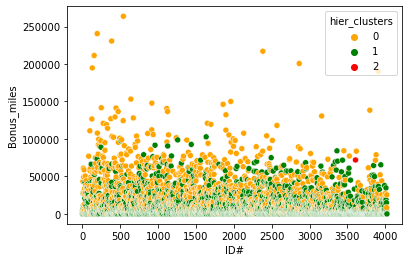

In [316]:
sns.scatterplot('ID#','Bonus_miles', hue='hier_clusters' , data = air_data,
                    palette=['orange','green','red'] )                 

<AxesSubplot:xlabel='Balance', ylabel='Qual_miles'>

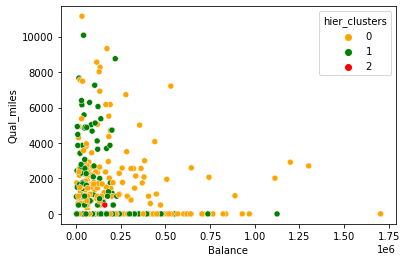

In [317]:
sns.scatterplot('Balance','Qual_miles', hue='hier_clusters' , data = air_data,
                    palette=['orange','green','red'] )    

## KMeans Clustering

In [318]:
air_data = pd.read_excel('EastWestAirlines.xlsx')
air_data.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [319]:
air_ds = air_data.iloc[:,1:]
scaler = StandardScaler()
scaled_input_ss = scaler.fit_transform(air_ds)
print(scaled_input_ss)

[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [-7.00507951e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
  -1.31754109e+00 -7.66919299e-01]]


1 [43989.000000000095]
2 [43989.000000000095, 35409.51662986136]
3 [43989.000000000095, 35409.51662986136, 30899.253324696245]
4 [43989.000000000095, 35409.51662986136, 30899.253324696245, 27153.766497637134]
5 [43989.000000000095, 35409.51662986136, 30899.253324696245, 27153.766497637134, 23700.510452910967]
6 [43989.000000000095, 35409.51662986136, 30899.253324696245, 27153.766497637134, 23700.510452910967, 21089.694784806936]
7 [43989.000000000095, 35409.51662986136, 30899.253324696245, 27153.766497637134, 23700.510452910967, 21089.694784806936, 19502.476951028417]
8 [43989.000000000095, 35409.51662986136, 30899.253324696245, 27153.766497637134, 23700.510452910967, 21089.694784806936, 19502.476951028417, 17369.169712473267]
9 [43989.000000000095, 35409.51662986136, 30899.253324696245, 27153.766497637134, 23700.510452910967, 21089.694784806936, 19502.476951028417, 17369.169712473267, 15963.609073080936]
10 [43989.000000000095, 35409.51662986136, 30899.253324696245, 27153.766497637134

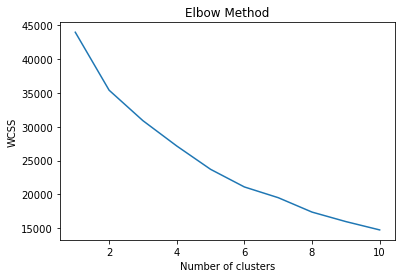

In [320]:
# How to find optimum number of  cluster before passing it in the KMeans() as n_clusters
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:
# wcss - within clusters creating sum of squared errors
# inertia is the sum of squared error for each cluster
# therefore, smaller the inertia, denser the cluster is (all points are closer to cluster)

wcss = []
for i in range(1,11): # n_clusters values from 1 to 11
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_input_ss) # passing scaled input
    wcss.append(kmeans.inertia_)
    print(i,wcss)
    
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

### KMeans Clustering =2

In [333]:
# from above elbow method clusters = 2,7
kmean_cluster = KMeans(n_clusters = 2, random_state = 42)
kmean_cluster.fit_predict(scaled_input_ss)
kmean_cluster.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [334]:
air_data['k_clusters'] = kmean_cluster.labels_
air_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [335]:
air_data['k_clusters'].value_counts()

1    2697
0    1302
Name: k_clusters, dtype: int64

In [336]:
air_data[air_data['k_clusters']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,3989,91605,0,4,1,1,37840,18,0,0,1444,0,0
3973,3996,72297,0,3,1,1,16241,16,0,0,1587,1,0
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,0
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,0


In [337]:
air_data[air_data['k_clusters']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


<AxesSubplot:xlabel='ID#', ylabel='Bonus_miles'>

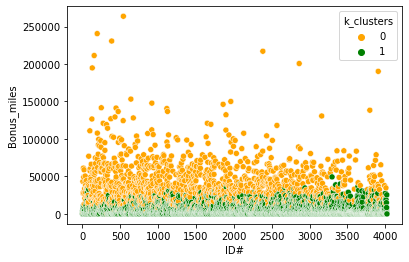

In [338]:
sns.scatterplot('ID#','Bonus_miles', hue='k_clusters' , data = air_data,
                    palette=['orange','green'] )

<AxesSubplot:xlabel='Balance', ylabel='Qual_miles'>

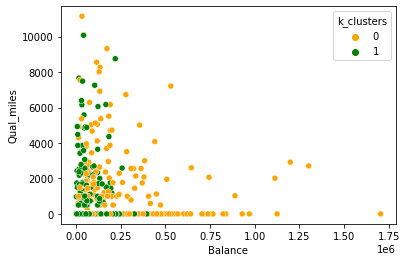

In [339]:
sns.scatterplot('Balance','Qual_miles', hue='k_clusters' , data = air_data,
                    palette=['orange','green'] ) 

### KMeans Clustering = 7

In [340]:
# from above elbow method clusters = 7
kmean_cluster = KMeans(n_clusters = 7)
kmean_cluster.fit_predict(scaled_input_ss)
kmean_cluster.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [341]:
air_data['k_clusters'] = kmean_cluster.labels_
air_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [342]:
air_data['k_clusters'].value_counts()

1    2059
2     892
0     800
4     135
5      55
3      43
6      15
Name: k_clusters, dtype: int64

In [343]:
air_data[air_data['k_clusters']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,0
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,0
19,20,23354,0,3,1,1,10447,5,0,0,6896,1,0
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,0
29,30,19221,0,1,1,1,4655,8,500,1,7896,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,0
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0


In [344]:
air_data[air_data['k_clusters']==6]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,6
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,6
850,861,25629,0,4,1,5,107308,36,600,2,5966,1,6
904,915,15835,0,2,1,5,112171,16,0,0,5825,1,6
1036,1047,154664,0,4,1,3,73881,33,0,0,5769,0,6
1244,1257,166465,0,4,1,4,98717,30,0,0,5531,0,6
1300,1313,737514,0,3,1,4,43993,40,2150,7,5030,0,6
1878,1895,128302,0,5,1,4,132263,32,400,2,4103,1,6
1917,1934,82981,0,5,1,3,105325,44,1000,2,3964,1,6
1946,1963,126873,0,4,1,5,95598,32,500,1,3880,1,6


<AxesSubplot:xlabel='ID#', ylabel='Bonus_miles'>

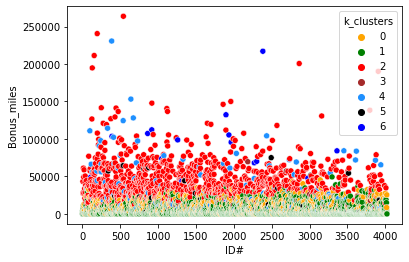

In [345]:
sns.scatterplot('ID#','Bonus_miles', hue='k_clusters' , data = air_data, 
                    palette=['orange','green','red','brown', 'dodgerblue','black', 'blue'] )

<AxesSubplot:xlabel='Balance', ylabel='Qual_miles'>

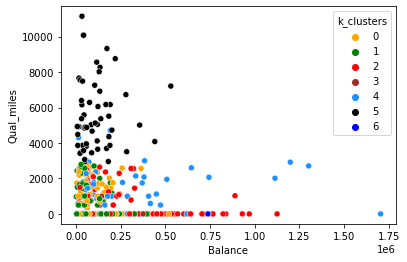

In [346]:
sns.scatterplot('Balance','Qual_miles', hue='k_clusters' , data = air_data, 
                    palette=['orange','green','red','brown', 'dodgerblue','black', 'blue'] )

## DBSCAN Clustering

In [347]:
air_data = pd.read_excel('EastWestAirlines.xlsx')
air_data.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [348]:
input_data = air_data.iloc[:,1:]
input_data.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [349]:
dbs = DBSCAN(min_samples=2 , eps = 25)
dbs_clusters=dbs.fit(input_data)
dbs_clusters.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [350]:
air_data['dbs_clusters'] = dbs_clusters.labels_
air_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbs_clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,-1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,-1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,-1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,-1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,-1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,-1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,-1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,-1


In [351]:
air_data['dbs_clusters'].value_counts()

-1    3993
 0       2
 2       2
 1       2
Name: dbs_clusters, dtype: int64

* DBSCAN separates noise (outliers) from the clusters.
* Here, 0, 1 and 2 are three different clusters, and -1 is the noise.
* DBSCAN will not include the noise in the clusters, it will keep noise as separate entity.

In [352]:
air_data[air_data['dbs_clusters'] == 1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbs_clusters
3565,3588,11875,0,1,1,1,3625,22,0,0,1408,0,1
3581,3604,11875,0,1,1,1,3625,22,0,0,1388,0,1


In [353]:
air_data[air_data['dbs_clusters'] == 2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbs_clusters
3827,3850,4342,0,1,1,1,0,0,0,0,1678,0,2
3845,3868,4351,0,1,1,1,0,0,0,0,1659,0,2


<AxesSubplot:xlabel='ID#', ylabel='Bonus_miles'>

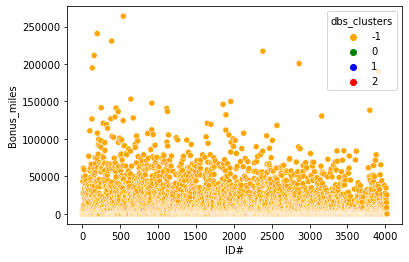

In [354]:
sns.scatterplot('ID#','Bonus_miles', hue='dbs_clusters' , data = air_data, 
                    palette=['orange','green','blue','red'] )

<AxesSubplot:xlabel='Balance', ylabel='Qual_miles'>

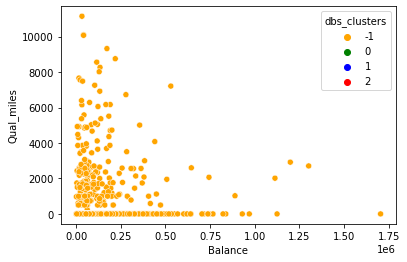

In [355]:
sns.scatterplot('Balance','Qual_miles', hue='dbs_clusters' , data = air_data, 
                    palette=['orange','green','blue','red'] )